In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
data = pd.read_csv("uber.csv")

In [4]:
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"])

In [5]:
missing_values = data.isnull().sum() 
print("Missing values in the dataset:") 
print(missing_values)

Missing values in the dataset:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [6]:
data.dropna(inplace=True)

In [7]:
missing_values = data.isnull().sum() 
print("Missing values after handling:") 
print(missing_values)

Missing values after handling:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


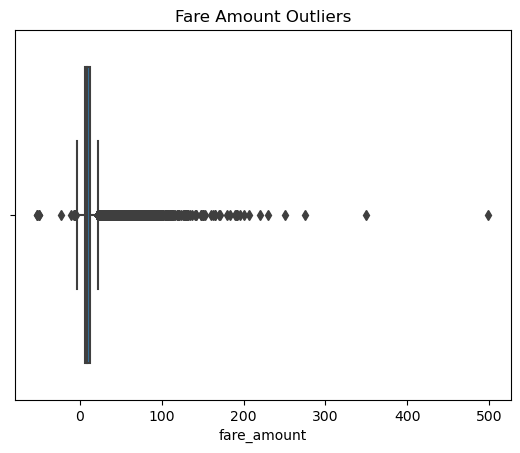

In [8]:
sns.boxplot(x=data["fare_amount"]) 
plt.title('Fare Amount Outliers') 
plt.show()

In [11]:
Q1 = data["fare_amount"].quantile(0.25)
Q3 = data["fare_amount"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

In [12]:
data_no_outliers = data[(data["fare_amount"] >= lower_bound) & (data["fare_amount"] <= upper_bound)]


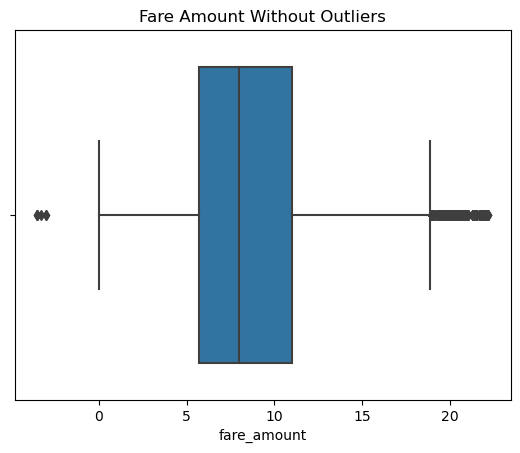

In [13]:
sns.boxplot(x=data_no_outliers["fare_amount"]) 
plt.title('Fare Amount Without Outliers')
plt.show()

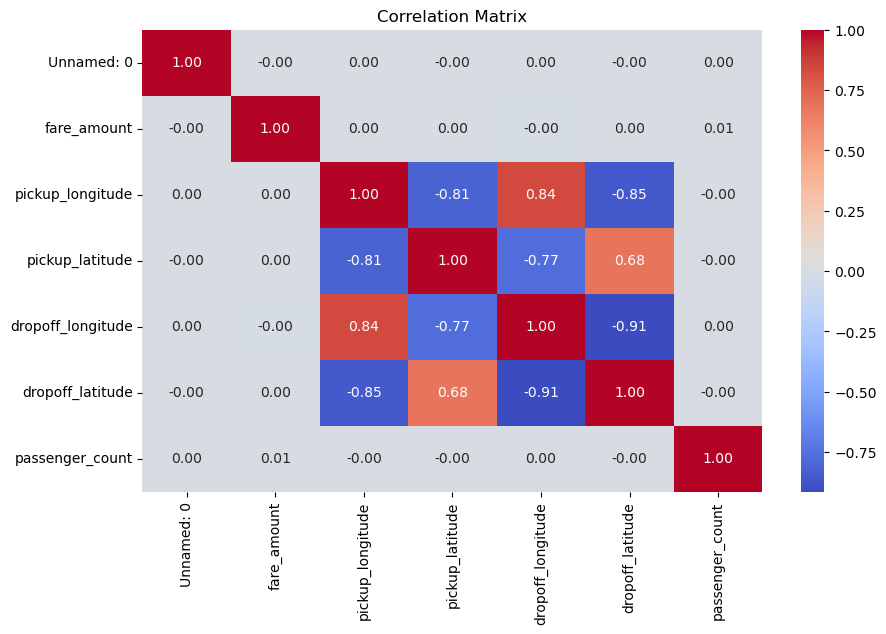

In [14]:
correlation_matrix = data_no_outliers.select_dtypes(include=[np.number]).corr() 
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm') 
plt.title('Correlation Matrix')
plt.show()

In [15]:
X = data_no_outliers[['pickup_longitude', 'pickup_latitude',
'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = data_no_outliers['fare_amount']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
lr_model = LinearRegression() 
lr_model.fit(X_train, y_train)

LinearRegression()

In [18]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) 
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
y_pred_lr = lr_model.predict(X_test) 
y_pred_rf = rf_model.predict(X_test)

In [20]:
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

In [21]:

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

In [23]:
print("Linear Regression - R2:", r2_lr) 
print("Linear Regression - RMSE:", rmse_lr)

print("Random Forest Regression - R2:", r2_rf) 
print("Random Forest Regression - RMSE:", rmse_rf)

Linear Regression - R2: 8.297133767465326e-05
Linear Regression - RMSE: 4.136624287486402
Random Forest Regression - R2: 0.7052136223044838
Random Forest Regression - RMSE: 2.2460416246528774
